In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeRegressor

In [3]:
regres = DecisionTreeRegressor(random_state=42)

In [4]:
X = [[1,2], [2,1], [3,6]]
y = [1.2,2.4,2]

In [5]:
regres.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [6]:
regres.predict([[2,3]])

array([2.4])

## Regression

In [7]:
X = np.sort(5 * np.random.rand(80,1), axis = 0)
y = np.sin(X).flatten()
y[::5] += 3 * (0.5 - np.random.rand(16))

In [8]:
regre_1 = DecisionTreeRegressor(random_state=42, max_depth=2)
regre_2 = DecisionTreeRegressor(random_state=42, max_depth=5,min_samples_leaf=12)
regre_1.fit(X, y)
regre_2.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=12,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [9]:
X_test = np.arange(0, 5, 0.05).reshape(-1,1)
y_pred_regre1 = regre_1.predict(X_test)
y_pred_regre2 = regre_2.predict(X_test)

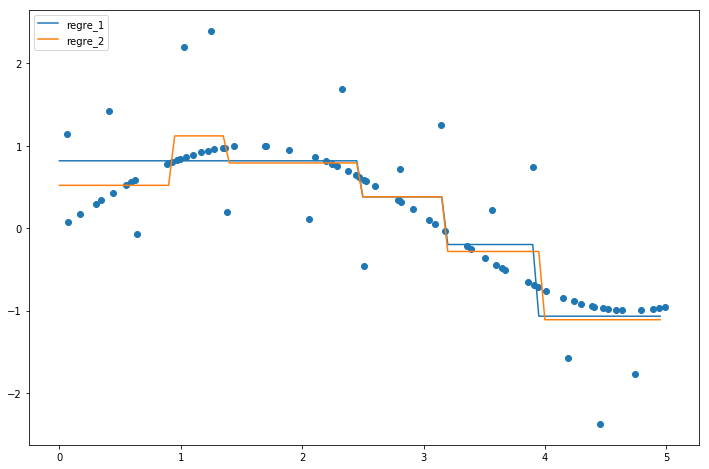

In [10]:
plt.figure(figsize=(12,8))
plt.plot(X_test, y_pred_regre1, '-', label = 'regre_1')
plt.plot(X_test, y_pred_regre2, '-', label = 'regre_2')
plt.scatter(X,y)
plt.legend(loc = 'upper left')
plt.show();

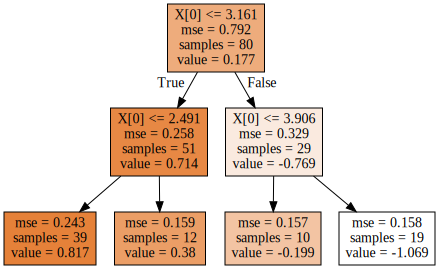

In [11]:
from sklearn import tree
import graphviz
data_dot = tree.export_graphviz(regre_1,
                                out_file=None,
                                filled=True)
graph = graphviz.Source(data_dot)
graph

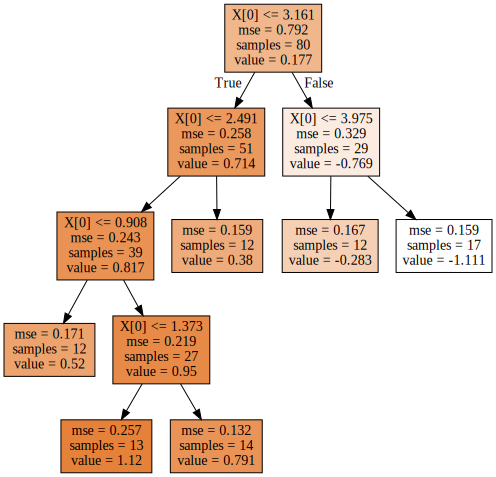

In [12]:
from sklearn import tree
import graphviz
data_dot = tree.export_graphviz(regre_2,
                                out_file=None,
                                filled=True)
graph = graphviz.Source(data_dot)
graph

 ## Overfitting

In [13]:
from sklearn.datasets import load_iris
X = load_iris().data[0:,0:2]
y = load_iris().target
clf = DecisionTreeRegressor(random_state=42)
clf.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

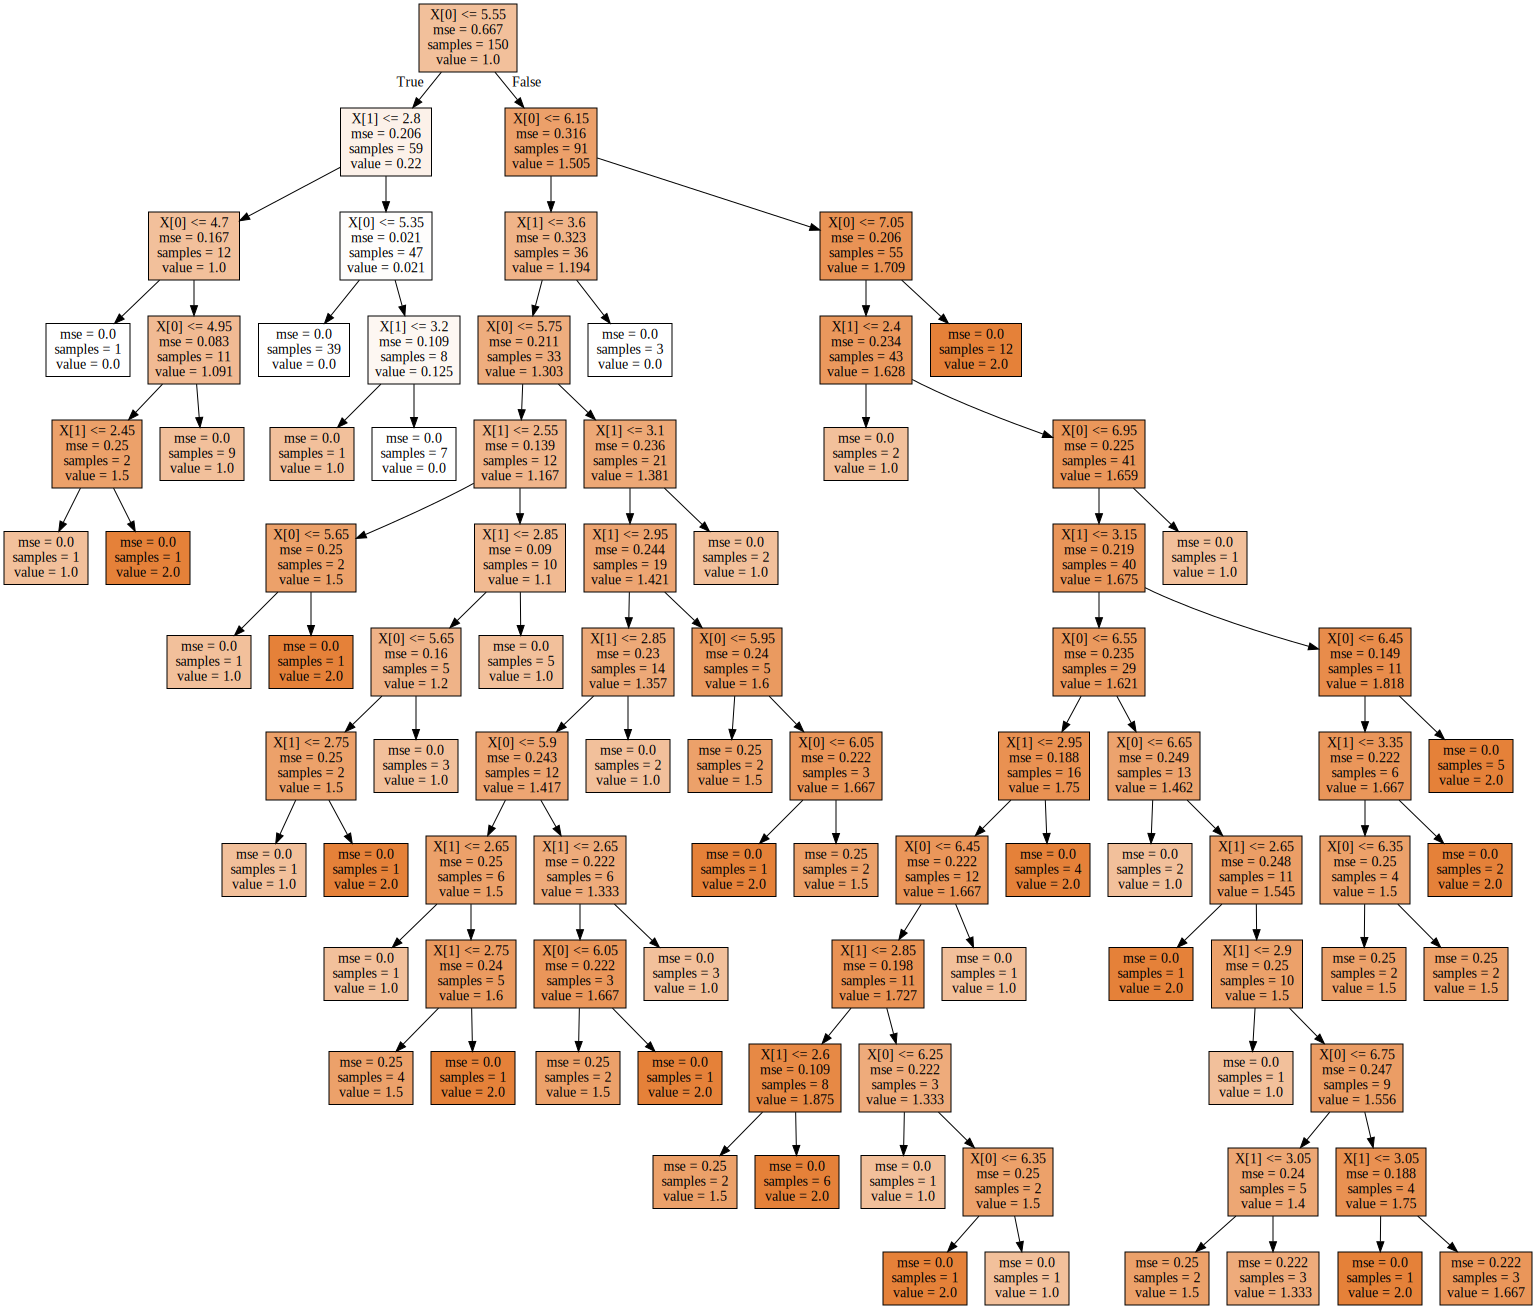

In [14]:
data_dot = tree.export_graphviz(clf, 
                                out_file=None, 
                                filled=True)
graph = graphviz.Source(data_dot)
graph

# Modelling end to end with Decision tree

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 1000, noise = 0.5, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
clf1 = tree.DecisionTreeClassifier(random_state = 42)
clf2 = tree.DecisionTreeClassifier(min_samples_leaf = 10,random_state = 42)

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
params = {#'criterion': list(range(0,5)),
          #'max_depth': list(range(0,5)),
          #'max_features': list(range(0,5)),
          'max_leaf_nodes': list(range(2,50)),
          #'min_impurity_decrease': list(np.linspace(0,1,10)),
          #'min_impurity_split': list(range(2,10)),
          'min_samples_leaf': list(range(5,25)),
          'min_samples_split': [2, 3, 4]}
          #'min_weight_fraction_leaf': list(np.linspace(0,1,10))}


In [18]:
grid_search_cv = GridSearchCV(clf1, param_grid = params, n_jobs = -1, cv = 3, verbose = 1)

In [19]:
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 2880 candidates, totalling 8640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 8640 out of 8640 | elapsed:    7.6s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'min_samples_leaf': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [20]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=4, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=21,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [21]:
y_pred = grid_search_cv.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_test, y_pred)

0.82

In [24]:
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
accuracy_score(y_test, y_pred)

0.74

In [25]:
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
accuracy_score(y_test, y_pred)

0.84